# Apple Stock Prices  

### Import necessary Liberaries that we using it 

In [9]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import random as rnd
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
%matplotlib inline 
import matplotlib.pyplot as plt
import plotly.express as px

### Loading the head of DataFrame

In [11]:
Apple = pd.read_csv('APPL_DATA.csv')
Apple.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600,0.100039
1,1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800,0.094820
2,1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000,0.087861
3,1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600,0.090035
4,1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600,0.092646


### using info() to find which the objects in DataFrame

In [12]:
Apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10564 entries, 0 to 10563
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10564 non-null  object 
 1   High       10564 non-null  float64
 2   Low        10564 non-null  float64
 3   Open       10564 non-null  float64
 4   Close      10564 non-null  float64
 5   Volume     10564 non-null  int64  
 6   Adj Close  10564 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 577.8+ KB


### Converting all Objects into integer

In [13]:
Apple['Date'].value_counts()

1980-12-12    1
2008-10-31    1
2008-11-04    1
2008-11-05    1
2008-11-06    1
             ..
1994-11-15    1
1994-11-16    1
1994-11-17    1
1994-11-18    1
2022-11-03    1
Name: Date, Length: 10564, dtype: int64

### Descriping DataFrame

In [14]:
Apple.describe()

,High,Low,Open,Close,Volume,Adj Close
count,10564.000000,10564.000000,10564.000000,10564.000000,1.056400e+04,10564.000000
mean,16.187715,15.828358,16.006351,16.014432,3.285773e+08,15.367037
std,34.769193,33.956052,34.354195,34.377804,3.381379e+08,34.090069
min,0.049665,0.049107,0.049665,0.049107,0.000000e+00,0.038276
25%,0.292411,0.279018,0.285714,0.285714,1.220100e+08,0.236919
50%,0.491071,0.474330,0.482690,0.483236,2.158618e+08,0.399397
75%,15.917679,15.549732,15.720536,15.762946,4.076800e+08,13.661840
max,182.940002,179.119995,182.630005,182.009995,7.421641e+09,181.259918


### Ploting historical data from matplotlib liberarary

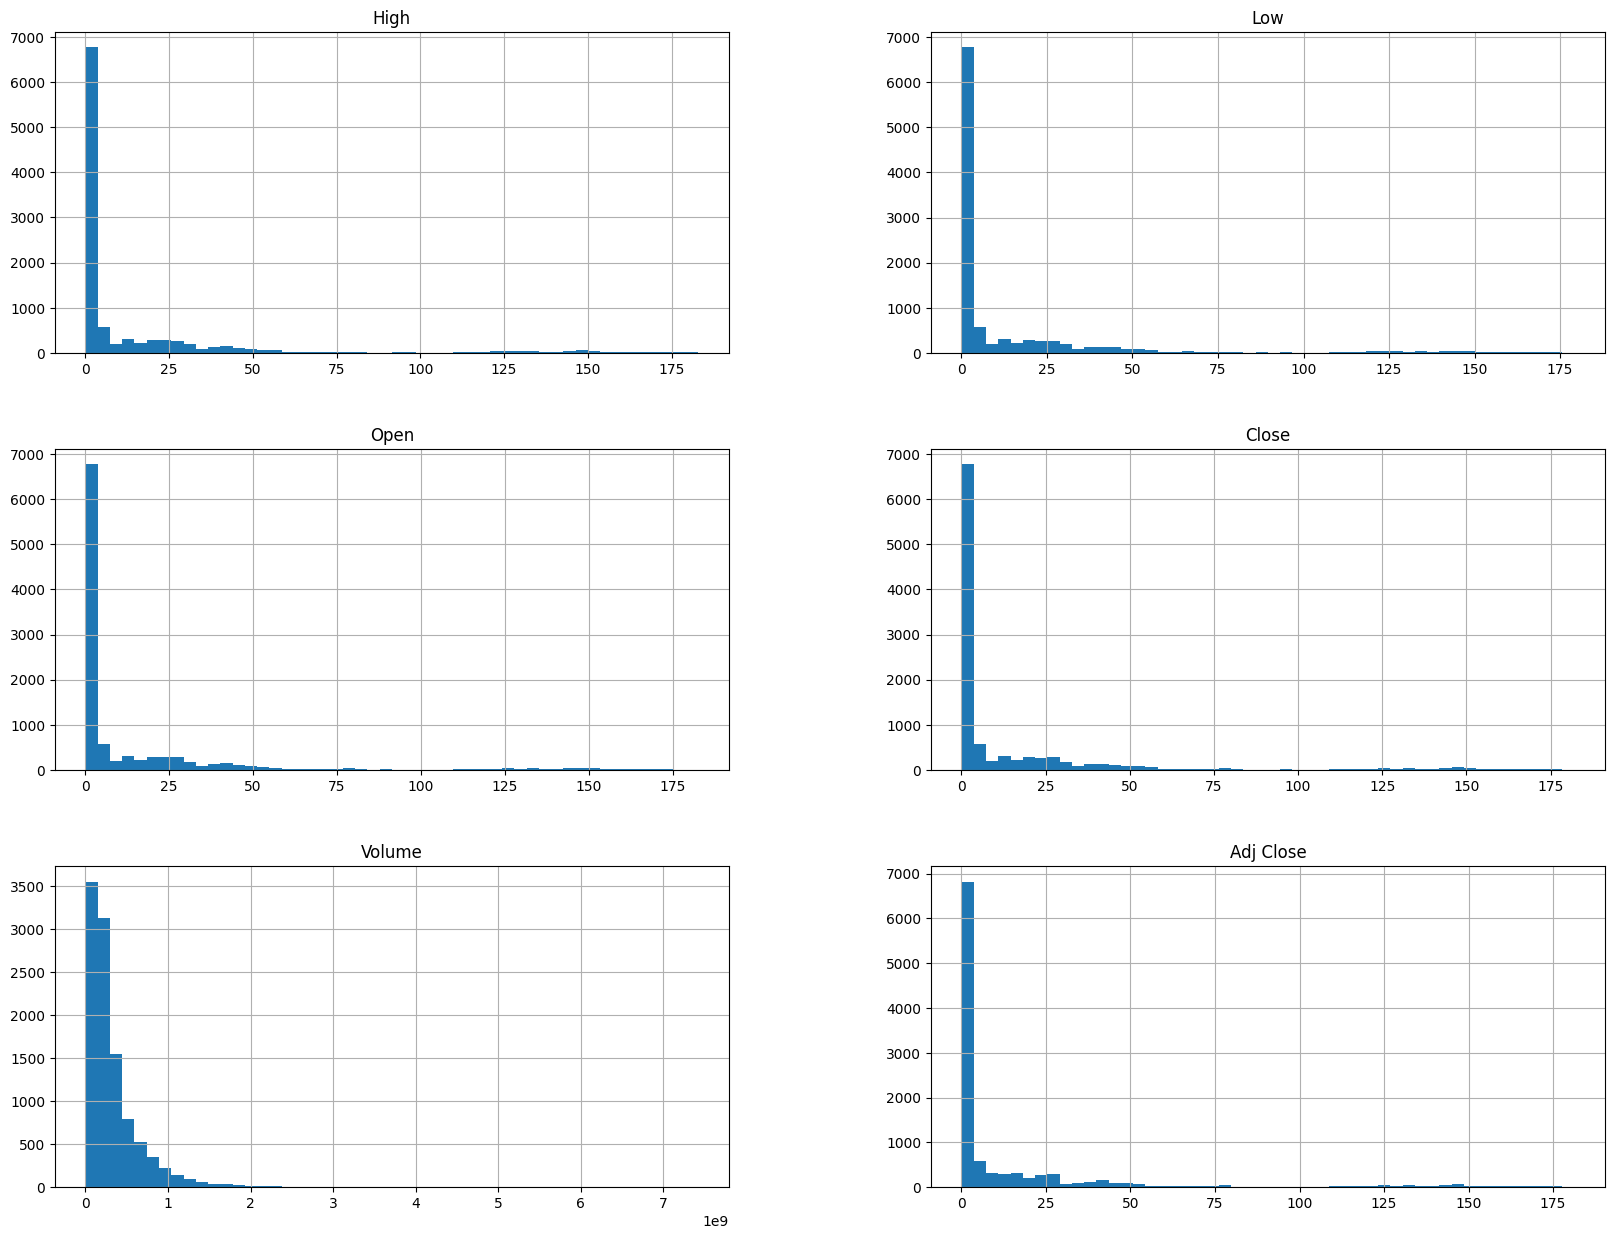

In [15]:
Apple.hist(bins=50, figsize=(20,15))
plt.show()

#### testing set by using numpy notes that not testing by numpy gives you the actual result for data but here it works well

In [16]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [17]:
train_set, test_set = split_train_test(Apple, 0.2)
len(train_set)


8452

In [18]:
len(test_set)

2112

### Using Test Set by using sklearn

In [19]:
train_set, test_set = train_test_split(Apple, test_size=0.2, random_state=42)
train_set


,Date,High,Low,Open,Close,Volume,Adj Close
9329,2017-12-08,42.750000,42.205002,42.622501,42.342499,93420800,40.330261
9802,2019-10-28,62.312500,61.680000,61.855000,62.262501,96572800,60.915478
334,1982-04-12,0.078683,0.077567,0.078125,0.077567,44307200,0.060459
1613,1987-05-01,0.357143,0.351563,0.354911,0.357143,132720000,0.278371
5526,2002-10-31,0.293571,0.284286,0.285536,0.286964,295836800,0.245019
...,...,...,...,...,...,...,...
5734,2003-08-29,0.408036,0.393750,0.396429,0.403750,263155200,0.344735
5191,2001-06-28,0.426964,0.409643,0.411607,0.420357,348409600,0.358914
5390,2002-04-19,0.455179,0.445179,0.455179,0.446071,375407200,0.380870
860,1984-05-08,0.147879,0.139509,0.139509,0.146763,255001600,0.114393


In [20]:
test_set

,Date,High,Low,Open,Close,Volume,Adj Close
8946,2016-06-03,24.567499,24.362499,24.447500,24.480000,114019600,22.707394
2907,1992-06-12,0.491071,0.484375,0.486607,0.487723,96510400,0.399148
10479,2022-07-07,146.550003,143.279999,143.289993,146.350006,66253700,146.147003
8025,2012-10-03,23.995001,23.665358,23.745001,23.980356,424281200,20.563103
3963,1996-08-15,0.203125,0.198661,0.202009,0.198661,107620800,0.169623
...,...,...,...,...,...,...,...
7262,2009-09-24,6.703571,6.527500,6.685714,6.565000,550880400,5.605407
8573,2014-12-09,28.575001,27.337500,27.547501,28.530001,240832000,25.723724
323,1982-03-25,0.074219,0.073661,0.074219,0.073661,84112000,0.057414
9956,2020-06-09,86.402496,83.002502,83.035004,85.997498,147712400,84.818840


### Vazulization Ploting Data By scatter plot

<AxesSubplot: xlabel='High', ylabel='Low'>

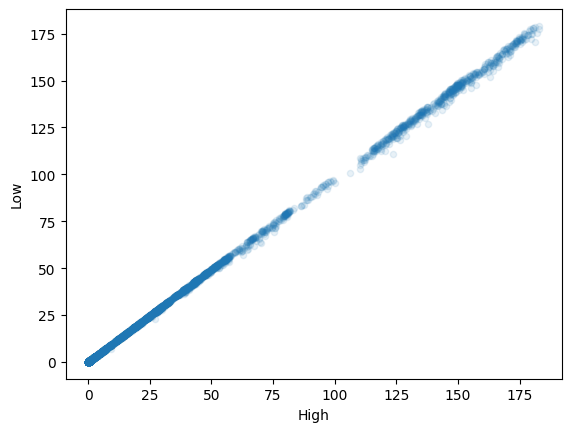

In [22]:
Apple.plot(kind="scatter", x="High", y="Low", alpha=0.1)

### In This Point Start to Train the Data

In [27]:
x = Apple.drop('High', axis = 'columns')
y = Apple.drop('Low', axis = 'columns')
print('shape of x', x.shape)
print('shape of y', y.shape)

shape of x (10564, 6)
shape of y (10564, 6)


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 51)

In [30]:
print("shape of x_train", X_train)
print("shape of y_train", Y_train)
print("shape of x_test", X_test)
print("shape of y_test", Y_test)

shape of x_train             Date        Low       Open      Close     Volume  Adj Close
4874  2000-03-27   1.222098   1.228795   1.246094  279182400   1.063955
6133  2005-04-01   1.448929   1.503214   1.460357  641284000   1.246899
9620  2019-02-07  42.584999  43.099998  42.735001  126966800  41.315212
5927  2004-06-07   0.514464   0.518571   0.532321  295876000   0.454513
1714  1987-09-24   0.493304   0.493304   0.504464  182560000   0.394307
...          ...        ...        ...        ...        ...        ...
1460  1986-09-23   0.156808   0.157366   0.161272  338240000   0.125702
1733  1987-10-21   0.339286   0.343750   0.361607  534240000   0.282645
1760  1987-11-30   0.272321   0.301339   0.294643  416640000   0.230805
485   1982-11-12   0.144531   0.147321   0.144531  131107200   0.112653
2105  1989-04-12   0.338170   0.341518   0.343750  387912000   0.272311

[8451 rows x 6 columns]
shape of y_train             Date       High       Open      Close     Volume  Adj Close
4874 

In [31]:
lr = LinearRegression()

In [38]:
msk = np.random.rand(len(Apple)) < 0.8
train = Apple[msk]
test = Apple[~msk]

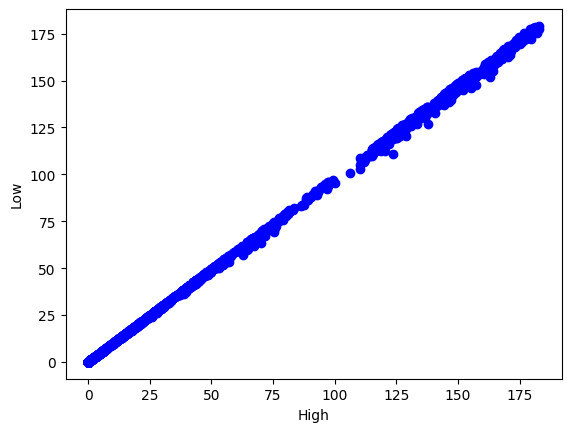

In [39]:
plt.scatter(train.High, train.Low,  color='blue')
plt.xlabel("High")
plt.ylabel("Low")
plt.show()

## Modeling Data

### Using sklearn package to model data

In [40]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['High']])
train_y = np.asanyarray(train[['Low']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.97660496]]
Intercept:  [0.02054341]


### Plot outputs that plot the fit line over the data

Text(0, 0.5, 'Low')

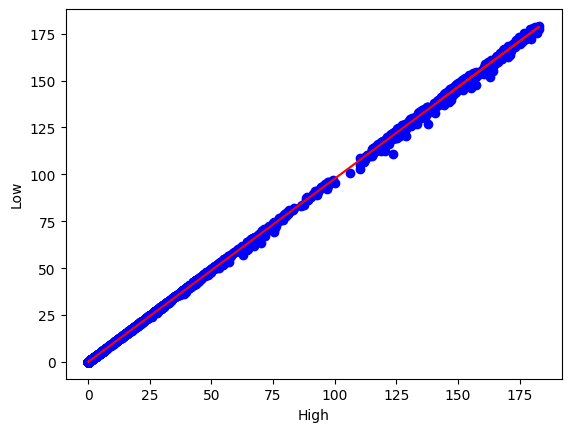

In [41]:
plt.scatter(train.High, train.Low,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("High")
plt.ylabel("Low")

## Evaluating Model

#### We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement by using MSE (Mean Square Error )

In [42]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['High']])
test_y = np.asanyarray(test[['Low']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 0.17
Residual sum of squares (MSE): 0.22
R2-score: 1.00
